In [1]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())
RANDOM_STATE = 42

# Loading the iris dataset

In [4]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [5]:
iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Defining two plotting functions

In [26]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

####################################

def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    fig = plt.figure(1, figsize=(10, 8))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

## Plotting first two components

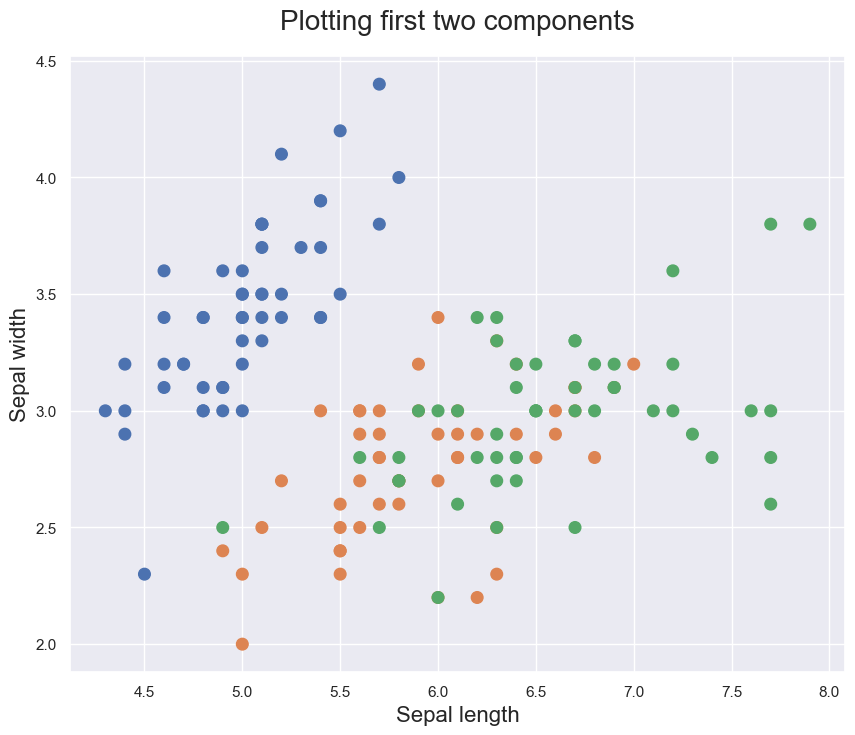

In [7]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

## 2D Plotting with t-SNE

In [8]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

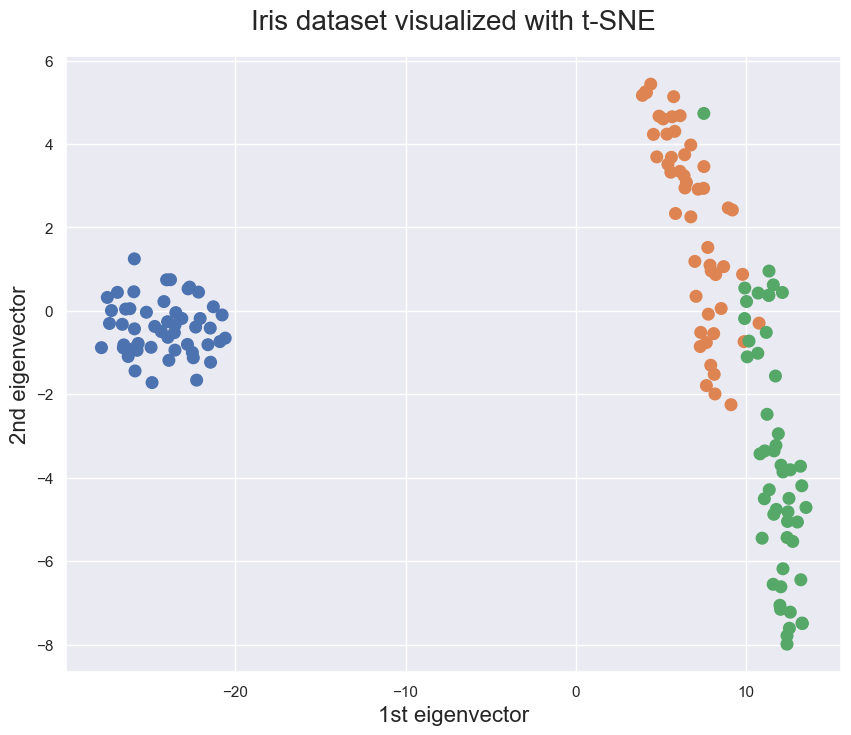

In [9]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

## 3D Plotting with t-SNE

In [10]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

In [27]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

/var/folders/m0/t3_0v49x6v9gdbz4l37dhs580000gn/T/ipykernel_71474/3922198027.py:33: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/var/folders/m0/t3_0v49x6v9gdbz4l37dhs580000gn/T/ipykernel_71474/3922198027.py:34: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/var/folders/m0/t3_0v49x6v9gdbz4l37dhs580000gn/T/ipykernel_71474/3922198027.py:35: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


<Figure size 1000x800 with 0 Axes>